In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#Importamos el dataset
df = pd.read_csv('data_cart_abandonment.csv')
df

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Session_ID_4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,Session_ID_4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,Session_ID_4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,Session_ID_4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1


In [3]:
#Eliminamos Id 
df = df.drop('ID', axis = 1)
df

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1


In [4]:
#Cambiamos las variables de "Yes" y "No" por 0 y 1 
columna = "Is_Product_Details_viewed"
mapeo = {"Yes": 1, "No": 0}
df[columna] = df[columna].replace(mapeo)
df

/tmp/ipykernel_33293/4030518681.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna] = df[columna].replace(mapeo)


,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,1,4,1.0,0,0.0,0,0,1,0,0,0,1
1,0,38,0.0,0,2.0,0,0,2,0,2,0,1
2,0,8,5.0,0,0.0,1,1,1,0,0,1,0
3,0,6,0.0,0,2.0,0,0,4,0,0,0,1
4,1,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,0,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,0,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,0,8,3.0,0,1.0,0,1,1,0,2,1,1


In [5]:
#imprimimos la forma del DF
df.shape

(4284, 12)

In [6]:
#Analizamos tanto series numéricas como de objetos, así como conjuntos de columnas de DataFrame de tipos de datos mixtos
df.describe()

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,0.282446,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,0.450242,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,1.000000,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [7]:
#Contamos cuantas personas bandonaron el carrito y quienes no lo abandonaron
df.Cart_Abandoned.value_counts()

Cart_Abandoned
1    3668
0     616
Name: count, dtype: int64

In [8]:
#Observamos el nombre de nuestras variables
features = df.columns[:-1].tolist()
features

['Is_Product_Details_viewed',
 'Session_Activity_Count',
 'No_Items_Added_InCart',
 'No_Items_Removed_FromCart',
 'No_Cart_Viewed',
 'No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Cart_Items_Viewed',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Customer_Segment_Type']

<Axes: >

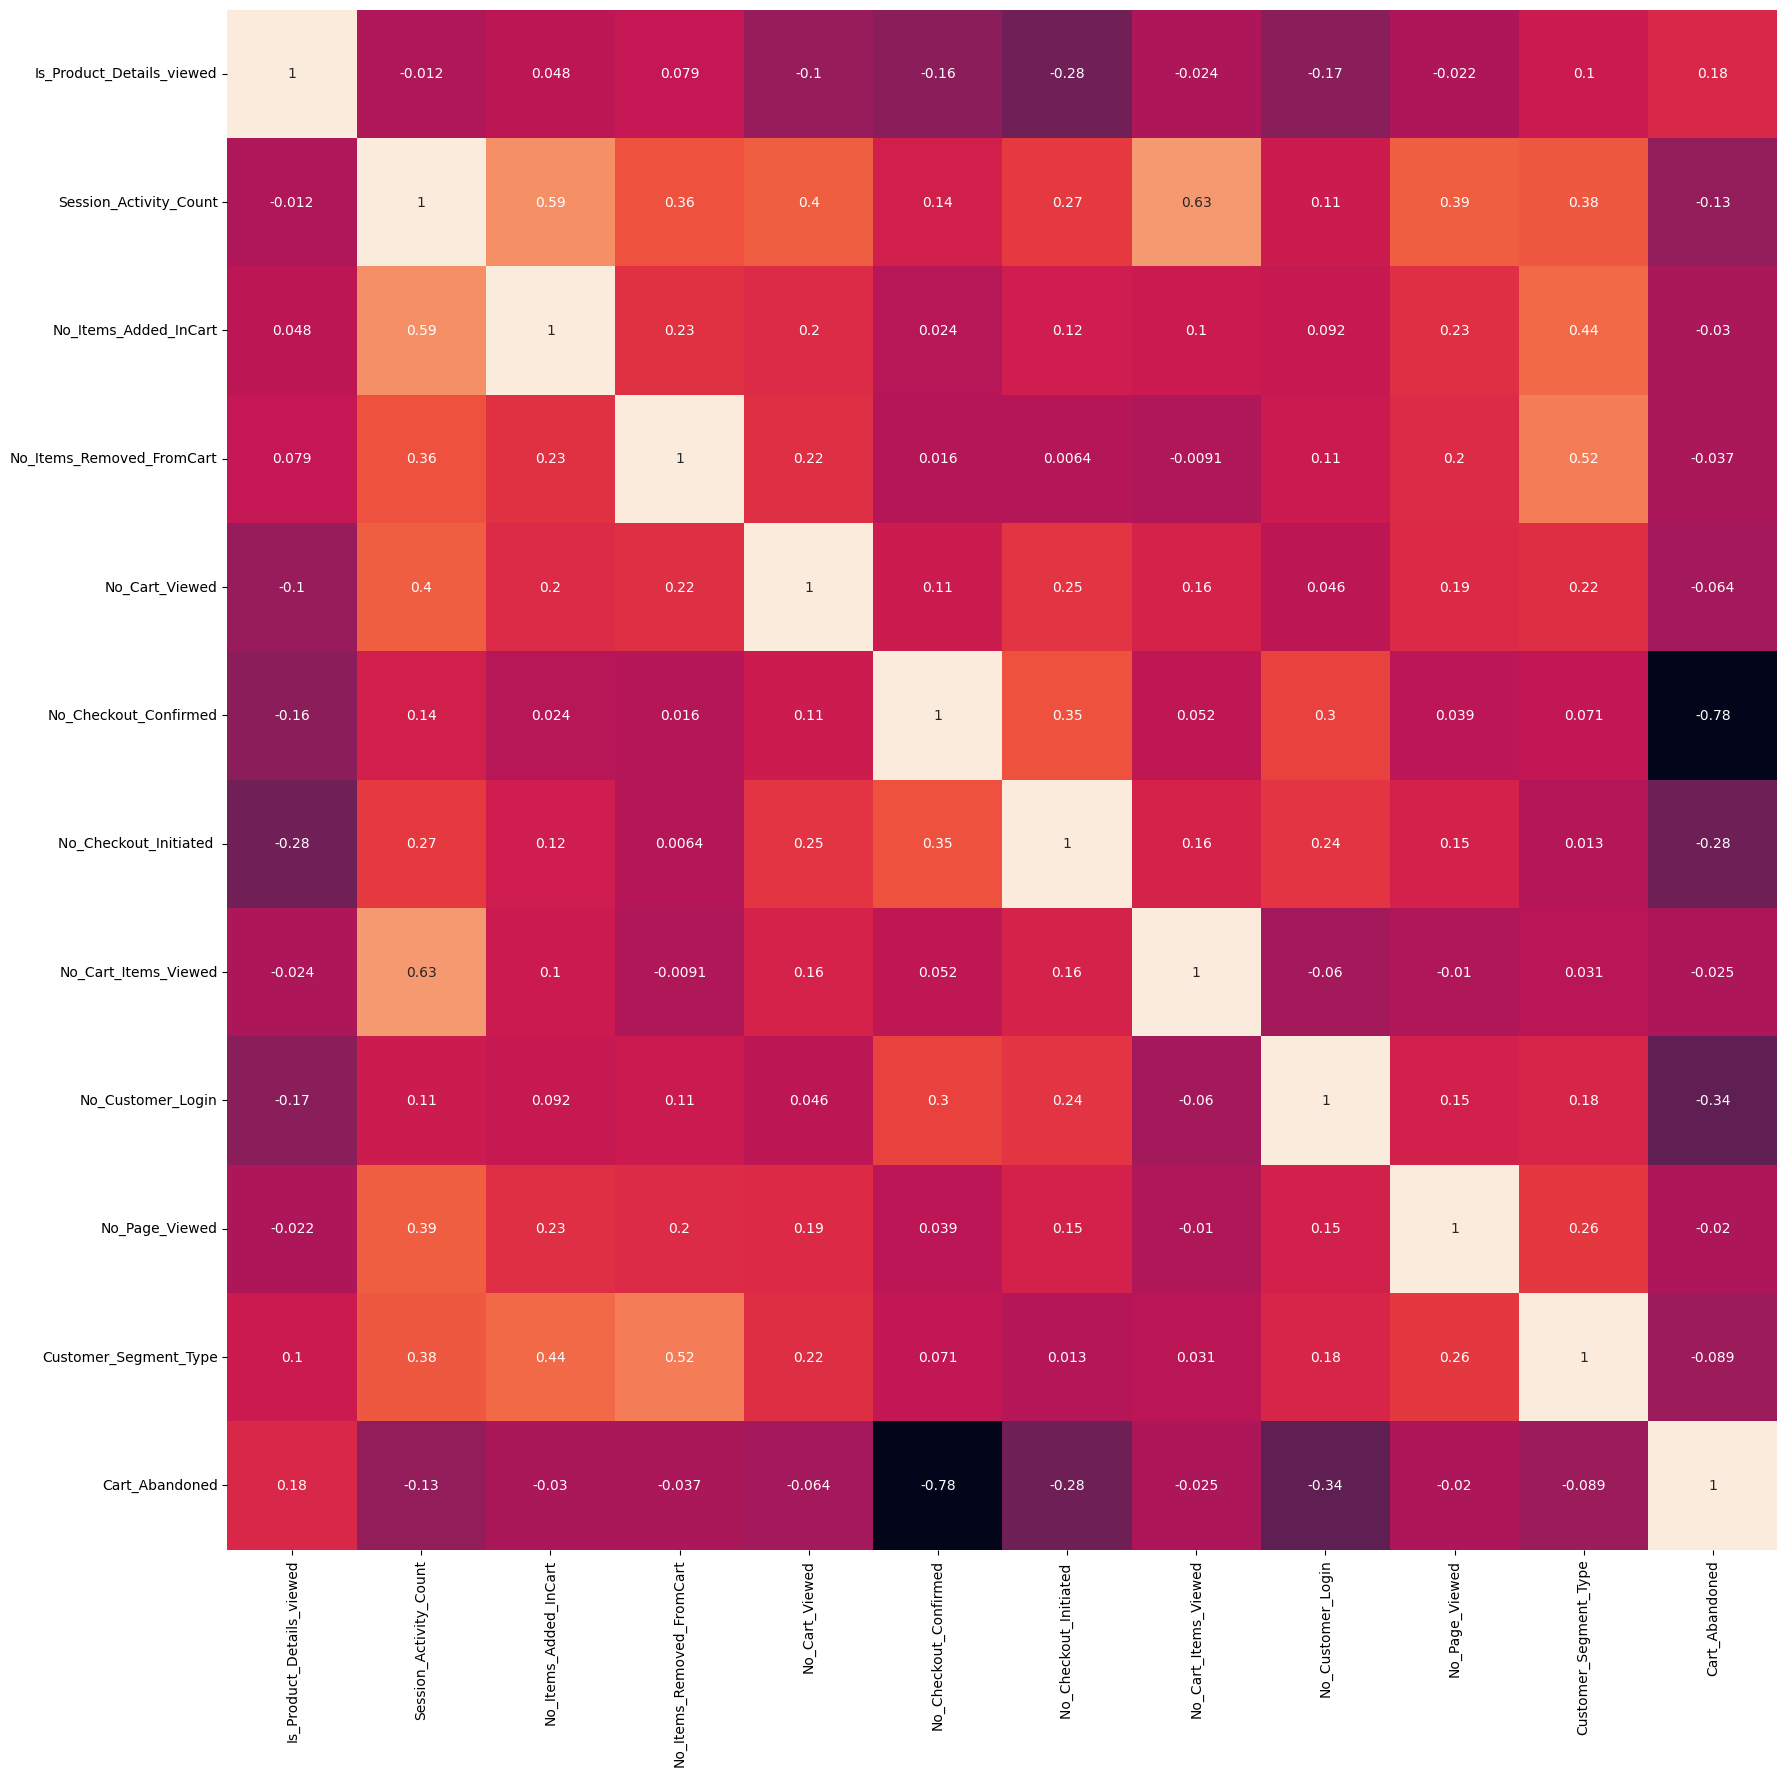

In [9]:
#Matriz de correlacion, para mostrar la correlación entre variables.
plt.figure(figsize = (20, 20))
corr_matrix = df.iloc[:, :12].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [10]:
#Suma de valores nulos
df.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [11]:
#Debido a que son muy pocos valores nulos se eliminan,, pero tambien se podrian sustituar por media, moda o mediana.
df = df.dropna()
df.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [12]:
#Se realiza un sampleo de 10 valores aleatorias para observar comportamiento
df.sample(10)

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
3131,0,11,3.0,0,1.0,1,1,1,1,2,1,0
2151,0,10,2.0,0,2.0,0,2,1,0,3,0,1
936,0,4,0.0,0,0.0,0,1,0,0,3,0,1
3305,0,1,0.0,0,1.0,0,0,0,0,0,0,1
2879,0,3,0.0,0,1.0,0,1,1,0,0,0,1
2537,0,20,14.0,0,0.0,0,1,1,0,3,1,1
2133,0,15,9.0,0,0.0,0,1,3,0,2,1,1
3613,0,9,0.0,0,2.0,0,1,1,0,5,0,1
1054,0,32,0.0,0,1.0,0,1,1,0,2,0,1
2603,0,8,0.0,0,1.0,0,2,2,0,1,0,1


In [13]:
#Visualizamos los tipos de cada variable
df.dtypes

Is_Product_Details_viewed      int64
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [14]:
#Separamos en X e y
#Selkeccionamos las columnas para X
X = df[['No_Checkout_Confirmed', 'No_Checkout_Initiated ', 'No_Customer_Login', 'Session_Activity_Count']]

#Selecionamos la variable target a predecir y
y = df['Cart_Abandoned']


In [15]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

In [16]:
from sklearn.utils import resample

# Separamos la data en train y test con 70% y 30% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Random oversample
X_train_resampled, y_train_resampled = resample(X_train, y_train, replace=True, random_state=42)


In [17]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
#Entrenamiento
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=10, random_state=42)

In [19]:
#Calculo de las predicciones en Train y Test
y_pred_test = random_forest.predict(X_test)
print("Test Set Predictions:", y_pred_test)

y_pred_train = random_forest.predict(X_train_resampled)
print("Train Set Predictions:", y_pred_train)
#y_train_pred = random_forest.predict(X_train_resampled)
#y_test_pred = random_forest.predict(y_train_resampled)

Test Set Predictions: [1 1 1 ... 1 1 1]
Train Set Predictions: [1 1 1 ... 1 1 1]


In [20]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_pred_test)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9899631983941117
El accuracy en test es: 0.9719188767550702


In [21]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
0,No_Checkout_Confirmed,0.826306
2,No_Customer_Login,0.069568
3,Session_Activity_Count,0.058443
1,No_Checkout_Initiated,0.045682


([0, 1, 2, 3],
 [Text(0, 0, 'No_Checkout_Confirmed'),
  Text(1, 0, 'No_Customer_Login'),
  Text(2, 0, 'Session_Activity_Count'),
  Text(3, 0, 'No_Checkout_Initiated ')])

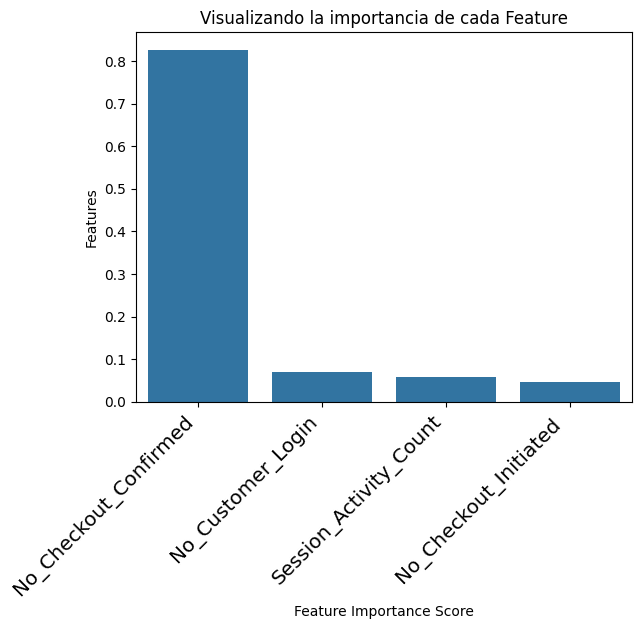

In [22]:
#Graficamos las variables mas importantes tomadas para la realizacion del modelo predictivo
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

In [23]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[ 153   14]
 [  22 1093]]


In [24]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       167
           1       0.99      0.98      0.98      1115

    accuracy                           0.97      1282
   macro avg       0.93      0.95      0.94      1282
weighted avg       0.97      0.97      0.97      1282



In [25]:
df.sample(10)

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
2592,1,4,1.0,1,0.0,0,0,0,0,1,0,1
1091,0,4,0.0,0,1.0,0,1,1,0,1,0,1
626,0,5,1.0,0,0.0,1,1,1,1,0,0,0
1105,1,10,5.0,0,1.0,0,0,2,0,2,1,1
1727,0,6,1.0,0,0.0,0,1,0,1,2,0,1
382,1,22,10.0,0,3.0,0,0,6,0,0,1,1
2915,0,5,0.0,0,3.0,0,1,0,0,1,0,1
2282,0,7,1.0,0,3.0,0,0,1,0,1,0,1
2334,0,14,3.0,3,1.0,1,1,1,1,2,2,0
654,1,9,2.0,0,1.0,0,1,1,0,3,0,1


In [26]:
input_data = (0,0,0,36)
# Cambiamos la data imput por array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#Definimos nuestra prediccion 
prediction = random_forest.predict(input_data_reshaped)
print(prediction)
#Condicionamos segun el resultado que vaya a arrojar nuestra pprediccion
if (prediction[0] == 0):
  print('La persona no es propensa a abandonar el carrito')
else:
  print('La persona es propensa a no abandonar el carrito')

[1]
La persona es propensa a no abandonar el carrito


/home/raul/c18-60-m-data-bi/app/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
#Se guarda el modleo en formato pkl para no volver a reentranr el modelo
import pickle
filename = 'CartAbandoned_model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

In [28]:
#Carga del modelo pkl
loaded_model = pickle.load(open(filename, 'rb'))

In [29]:
#Imprimimos las columnas que se van a tomar en cuenta para desplegar nuestra aplicacion
for column in X.columns:
  print(column)


No_Checkout_Confirmed
No_Checkout_Initiated 
No_Customer_Login
Session_Activity_Count
